# TMDB Movie Data Analysis Pipeline.

## Project objectives:
1. API Data extraction
2. Data cleaning and Transformation
3. Exploratory Data Analysis
4. Advance filtering and Ranking
5. Franchise and Director analysis



#Importing Project Dependencies and Libraries

In [ ]:
import os
import ast
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Setting up Environment variables

# Extracting the TMDB movies data from and API endpoint

In [ ]:
import requests
import os
load_dotenv()

def extract_tmdb_data(api_key, movie_ids):

    base_url = 'https://api.themoviedb.org/3/movie/'
    movies_data = []

    for movie_id in movie_ids:
        # Construct the URL correctly for the specific movie_id
        url = f"{base_url}{movie_id}?api_key={api_key}&language=en-US"

        try:
            response = requests.get(url)

            # Check for a successful status code
            if response.status_code == 200:
                movie_data = response.json()
                movies_data.append(movie_data)
            else:
                # Print specific error details (status code and ID)
                print(f"Failed to fetch movie with ID {movie_id}. Status Code: {response.status_code}")

        except requests.exceptions.RequestException as e:
            # Handle network-related errors
            print(f"An error occurred while fetching ID {movie_id}: {e}")

    return movies_data



# Ensure you have set the environment variable 'TMDB_API_KEY'
api_key = os.getenv('TMDB_API_KEY')

if not api_key:
    print("Error: TMDB_API_KEY environment variable not found. Please set it.")
else:
    movie_ids = [0, 299534, 19995, 140607, 299536, 597,
                 135397, 420818, 24428, 168259, 99861, 284054,
                 12445, 181808, 330457, 351286, 109445, 321612,
                 260513]

    movies = extract_tmdb_data(api_key, movie_ids)

    # Check the result
    print(f"\nSuccessfully extracted data for {len(movies)} movies.")






Failed to fetch movie with ID 0. Status Code: 404

Successfully extracted data for 18 movies.


In [ ]:
movies_df = pd.DataFrame(movies)
movies_df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'origin_country', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count'],
      dtype='object')

#Data cleaning and Preprocessing

In [ ]:
# Droping irrelevant columns
columns_to_drop = ['adult', 'imdb_id', 'original_title', 'video', 'homepage']

# Drop only existing columns
existing_columns_to_drop = [col for col in columns_to_drop if col in movies_df.columns]
movies_df.drop(columns=existing_columns_to_drop, inplace=True)


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   backdrop_path          18 non-null     object 
 1   belongs_to_collection  16 non-null     object 
 2   budget                 18 non-null     int64  
 3   genres                 18 non-null     object 
 4   id                     18 non-null     int64  
 5   origin_country         18 non-null     object 
 6   original_language      18 non-null     object 
 7   overview               18 non-null     object 
 8   popularity             18 non-null     float64
 9   poster_path            18 non-null     object 
 10  production_companies   18 non-null     object 
 11  production_countries   18 non-null     object 
 12  release_date           18 non-null     object 
 13  revenue                18 non-null     int64  
 14  runtime                18 non-null     int64  
 15  spoken_l

In [ ]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1.800000e+01,18.000000,18.000000,1.800000e+01,18.000000,18.000000,18.000000
mean,2.137778e+08,192258.444444,15.158361,1.691832e+09,138.055556,7.395556,20424.444444
std,6.195972e+07,132476.949284,10.187563,5.210623e+08,23.848720,0.506981,7741.448118
min,1.250000e+08,597.000000,6.917300,1.243226e+09,102.000000,6.538000,10072.000000
25%,1.625000e+08,102257.000000,8.817950,1.334902e+09,125.250000,7.126500,13984.000000
50%,2.000000e+08,175033.500000,10.381350,1.484542e+09,135.500000,7.285500,20612.000000
75%,2.430000e+08,299535.500000,18.893200,1.957196e+09,147.500000,7.797250,25852.250000
max,3.560000e+08,420818.000000,45.928900,2.923706e+09,194.000000,8.238000,34224.000000


In [ ]:
movies_df

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,[US],en,After the devastating events of Avengers: Infi...,13.9608,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,8.238,26962
1,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",26.7105,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,7.594,32856
2,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,[US],en,Thirty years after defeating the Galactic Empi...,8.2672,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,7.300,20103
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536,[US],en,As the Avengers and their allies have continue...,22.0512,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,31176
4,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,None,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,28.5469,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on earth could come between them.,Titanic,7.903,26511
5,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397,[US],en,Twenty-two years after the events of Jurassic ...,9.3334,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-06,1671537444,124,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The park is open.,Jurassic World,6.700,21121
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,"{'id': 762512, 'name': 'The Lion King (Reboot)...",260000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.7748,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-07-12,1662020819,118,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The king has returned.,The Lion King,7.102,10570
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",24428,[US],en,When an unexpected enemy emerges and threatens...,45.9289,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-04-25,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,7.865,34224
8,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,"{'id': 9485, 'name': 'The Fast and the Furious...",190000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",168259,[US],en,Deckard Shaw seeks revenge again

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   backdrop_path          18 non-null     object 
 1   belongs_to_collection  16 non-null     object 
 2   budget                 18 non-null     int64  
 3   genres                 18 non-null     object 
 4   id                     18 non-null     int64  
 5   origin_country         18 non-null     object 
 6   original_language      18 non-null     object 
 7   overview               18 non-null     object 
 8   popularity             18 non-null     float64
 9   poster_path            18 non-null     object 
 10  production_companies   18 non-null     object 
 11  production_countries   18 non-null     object 
 12  release_date           18 non-null     object 
 13  revenue                18 non-null     int64  
 14  runtime                18 non-null     int64  
 15  spoken_l

In [ ]:
def extract_name_from_json(json_obj):
    """
    Safely extracts names from dictionary or list-of-dictionary structures.

    Args:
        json_obj: A JSON object (dictionary, list of dictionaries, or string representation)
                  or None.

    Returns:
        A string of names separated by '|' if multiple, a single name, or np.nan if not found or invalid.
    """
    if json_obj is None:
        return np.nan

    try:
        # Attempt to convert string representation of JSON to a Python object
        if isinstance(json_obj, str):
            parsed_obj = ast.literal_eval(json_obj)
        else:
            parsed_obj = json_obj

        if isinstance(parsed_obj, dict):
            # If it's a dictionary, extract the 'name' key
            return parsed_obj.get('name', np.nan)
        elif isinstance(parsed_obj, list):
            # If it's a list, iterate and extract 'name' from each dictionary
            names = []
            for item in parsed_obj:
                if isinstance(item, dict) and 'name' in item:
                    names.append(item['name'])
            return '|'.join(names) if names else np.nan
        else:
            return np.nan

    except (ValueError, SyntaxError, TypeError):
        # Handle errors during ast.literal_eval or if the structure is unexpected
        return np.nan

print("Finish extracting name from json columns.")

Finish extracting name from json columns.


In [ ]:
columns_to_process = ['genres', 'spoken_languages', 'production_companies', 'production_countries', 'belongs_to_collection']

for col in columns_to_process:
    if col in movies_df.columns: # Check if column exists before processing
        movies_df[col] = movies_df[col].apply(extract_name_from_json)
        print(f"JSON column '{col}' processed in-place.")
    else:
        print(f"Warning: Column '{col}' not found in DataFrame. Skipping processing.")

print("JSON columns processing complete.")
movies_df.head()
movies_df.info()

JSON column 'genres' processed in-place.
JSON column 'spoken_languages' processed in-place.
JSON column 'production_companies' processed in-place.
JSON column 'production_countries' processed in-place.
JSON column 'belongs_to_collection' processed in-place.
JSON columns processing complete.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   backdrop_path          18 non-null     object 
 1   belongs_to_collection  16 non-null     object 
 2   budget                 18 non-null     int64  
 3   genres                 18 non-null     object 
 4   id                     18 non-null     int64  
 5   origin_country         18 non-null     object 
 6   original_language      18 non-null     object 
 7   overview               18 non-null     object 
 8   popularity             18 non-null     float64
 9   poster_path            18 no

In [ ]:
movies_df

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,The Avengers Collection,356000000,Adventure|Science Fiction|Action,299534,[US],en,After the devastating events of Avengers: Infi...,13.9608,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,...,United States of America,2019-04-24,2799439100,181,English|日本語|,Released,Avenge the fallen.,Avengers: Endgame,8.238,26962
1,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",26.7105,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,United States of America|United Kingdom,2009-12-15,2923706026,162,English|Español,Released,Enter the world of Pandora.,Avatar,7.594,32856
2,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,8.2672,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,United States of America,2015-12-15,2068223624,136,English,Released,Every generation has a story.,Star Wars: The Force Awakens,7.300,20103
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300000000,Adventure|Action|Science Fiction,299536,[US],en,As the Avengers and their allies have continue...,22.0512,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,United States of America,2018-04-25,2052415039,149,English|,Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,31176
4,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,200000000,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,28.5469,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,United States of America,1997-11-18,2264162353,194,English|Français|Deutsch|svenska|Italiano|Pусский,Released,Nothing on earth could come between them.,Titanic,7.903,26511
5,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,150000000,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,9.3334,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,United States of America,2015-06-06,1671537444,124,English,Released,The park is open.,Jurassic World,6.700,21121
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,260000000,Adventure|Drama|Family|Animation,420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.7748,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,United States of America,2019-07-12,1662020819,118,English,Released,The king has returned.,The Lion King,7.102,10570
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,220000000,Science Fiction|Action|Adventure,24428,[US],en,When an unexpected enemy emerges and threatens...,45.9289,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,United States of America,2012-04-25,1518815515,143,English|हिन्दी|Pусский,Released,Some assembly required.,The Avengers,7.865,34224
8,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190000000,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,8.1661,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,United States of America,2015-04-01,1515400000,139,العربية|English|Español|ภาษาไทย,Released,Vengeance hits home.,Furious 7,7.223,11031
9,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,The Avengers Collection,235000000,Action|Adventure|Science Fiction,99861,[US],en,When Tony Stark tries to jumpstart a dormant p...,10.9130,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,United States of America,2015-04-22,1405403694,141,English,Released,A new age has come.,Avengers: Age of Ultron,7.271,23876


In [ ]:
# Convert specified columns to numeric, coercing errors to NaN
numeric_cols = ['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
for col in numeric_cols:
    movies_df[col] = pd.to_numeric(movies_df[col], errors='coerce')

# Convert 'release_date' to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

print("Datatype conversions applied.")

Datatype conversions applied.


In [ ]:
movies_df

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,The Avengers Collection,356000000,Adventure|Science Fiction|Action,299534,[US],en,After the devastating events of Avengers: Infi...,13.9608,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,...,United States of America,2019-04-24,2799439100,181,English|日本語|,Released,Avenge the fallen.,Avengers: Endgame,8.238,26962
1,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",26.7105,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,United States of America|United Kingdom,2009-12-15,2923706026,162,English|Español,Released,Enter the world of Pandora.,Avatar,7.594,32856
2,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,8.2672,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,United States of America,2015-12-15,2068223624,136,English,Released,Every generation has a story.,Star Wars: The Force Awakens,7.300,20103
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300000000,Adventure|Action|Science Fiction,299536,[US],en,As the Avengers and their allies have continue...,22.0512,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,United States of America,2018-04-25,2052415039,149,English|,Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,31176
4,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,200000000,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,28.5469,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,United States of America,1997-11-18,2264162353,194,English|Français|Deutsch|svenska|Italiano|Pусский,Released,Nothing on earth could come between them.,Titanic,7.903,26511
5,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,150000000,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,9.3334,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,United States of America,2015-06-06,1671537444,124,English,Released,The park is open.,Jurassic World,6.700,21121
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,260000000,Adventure|Drama|Family|Animation,420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.7748,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,United States of America,2019-07-12,1662020819,118,English,Released,The king has returned.,The Lion King,7.102,10570
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,220000000,Science Fiction|Action|Adventure,24428,[US],en,When an unexpected enemy emerges and threatens...,45.9289,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,United States of America,2012-04-25,1518815515,143,English|हिन्दी|Pусский,Released,Some assembly required.,The Avengers,7.865,34224
8,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190000000,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,8.1661,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,United States of America,2015-04-01,1515400000,139,العربية|English|Español|ภาษาไทย,Released,Vengeance hits home.,Furious 7,7.223,11031
9,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,The Avengers Collection,235000000,Action|Adventure|Science Fiction,99861,[US],en,When Tony Stark tries to jumpstart a dormant p...,10.9130,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,United States of America,2015-04-22,1405403694,141,English,Released,A new age has come.,Avengers: Age of Ultron,7.271,23876


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   backdrop_path          18 non-null     object        
 1   belongs_to_collection  16 non-null     object        
 2   budget                 18 non-null     int64         
 3   genres                 18 non-null     object        
 4   id                     18 non-null     int64         
 5   origin_country         18 non-null     object        
 6   original_language      18 non-null     object        
 7   overview               18 non-null     object        
 8   popularity             18 non-null     float64       
 9   poster_path            18 non-null     object        
 10  production_companies   18 non-null     object        
 11  production_countries   18 non-null     object        
 12  release_date           18 non-null     datetime64[ns]
 13  revenue

In [ ]:
movies_df.isnull().sum()

,0
backdrop_path,0
belongs_to_collection,2
budget,0
genres,0
id,0
origin_country,0
original_language,0
overview,0
popularity,0
poster_path,0


In [ ]:
movies_df['backdrop_path'].value_counts()

,count
backdrop_path,
/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,1
/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,1
/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,1
/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,1
/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,1
/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,1
/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,1
/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,1
/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,1


In [ ]:
movies_df["genres"].value_counts()

,count
genres,
Adventure|Action|Science Fiction,3
Action|Adventure|Science Fiction|Thriller,2
Action|Adventure|Science Fiction,2
Action|Adventure|Fantasy|Science Fiction,1
Drama|Romance,1
Adventure|Science Fiction|Action,1
Adventure|Drama|Family|Animation,1
Science Fiction|Action|Adventure,1
Action|Crime|Thriller,1


In [ ]:
movies_df["budget"]

,budget
0,356000000
1,237000000
2,245000000
3,300000000
4,200000000
5,150000000
6,260000000
7,220000000
8,190000000
9,235000000


In [ ]:

# Replace zeros in budget, revenue, runtime with NaN
numeric_zero_cols = ["budget", "revenue", "runtime"]

for col in numeric_zero_cols:
    if col in movies_df.columns:
        movies_df[col] = movies_df[col].replace(0, np.nan)

# 2. Convert budget & revenue to millions of USD

for col in ["budget", "revenue"]:
    if col in movies_df.columns:
        movies_df[col] = movies_df[col] / 1_000_000

# 3. Handle vote_count = 0
#     Rule: if vote_count = 0 → vote_average likely unreliable
#     Replace vote_average with NaN for safety

if "vote_count" in movies_df.columns and "vote_average" in movies_df.columns:
    movies_df.loc[movies_df["vote_count"] == 0, "vote_average"] = np.nan

# 4. Clean 'overview' and 'tagline'
#     Replace placeholders with NaN

text_columns = ["overview", "tagline"]
placeholders = ["No Data", "No overview available.", "None", "", "nan", "N/A"]

for col in text_columns:
    if col in movies_df.columns:
        movies_df[col] = movies_df[col].replace(placeholders, np.nan)

# Trim whitespace and convert empty strings to NaN
        movies_df[col] = movies_df[col].astype("string").str.strip()
        movies_df[col] = movies_df[col].replace("", np.nan)


In [ ]:
movies_df

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,The Avengers Collection,356.0,Adventure|Science Fiction|Action,299534,[US],en,After the devastating events of Avengers: Infi...,13.9608,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,...,United States of America,2019-04-24,2799.439100,181,English|日本語|,Released,Avenge the fallen.,Avengers: Endgame,8.238,26962
1,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,237.0,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",26.7105,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,United States of America|United Kingdom,2009-12-15,2923.706026,162,English|Español,Released,Enter the world of Pandora.,Avatar,7.594,32856
2,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245.0,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,8.2672,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,United States of America,2015-12-15,2068.223624,136,English,Released,Every generation has a story.,Star Wars: The Force Awakens,7.300,20103
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300.0,Adventure|Action|Science Fiction,299536,[US],en,As the Avengers and their allies have continue...,22.0512,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,United States of America,2018-04-25,2052.415039,149,English|,Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,31176
4,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,200.0,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,28.5469,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,United States of America,1997-11-18,2264.162353,194,English|Français|Deutsch|svenska|Italiano|Pусский,Released,Nothing on earth could come between them.,Titanic,7.903,26511
5,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,150.0,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,9.3334,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,United States of America,2015-06-06,1671.537444,124,English,Released,The park is open.,Jurassic World,6.700,21121
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,260.0,Adventure|Drama|Family|Animation,420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.7748,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,United States of America,2019-07-12,1662.020819,118,English,Released,The king has returned.,The Lion King,7.102,10570
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,220.0,Science Fiction|Action|Adventure,24428,[US],en,When an unexpected enemy emerges and threatens...,45.9289,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,United States of America,2012-04-25,1518.815515,143,English|हिन्दी|Pусский,Released,Some assembly required.,The Avengers,7.865,34224
8,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190.0,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,8.1661,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,United States of America,2015-04-01,1515.400000,139,العربية|English|Español|ภาษาไทย,Released,Vengeance hits home.,Furious 7,7.223,11031
9,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,The Avengers Collection,235.0,Action|Adventure|Science Fiction,99861,[US],en,When Tony Stark tries to jumpstart a dormant p...,10.9130,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,United States of America,2015-04-22,1405.403694,141,English,Released,A new age has come.,Avengers: Age of Ultron,7.271,23876


In [ ]:
#Removing duplicate values in Id and title
movies_df.drop_duplicates(subset=['id', 'title'], inplace=True)

In [ ]:
movies_df

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,The Avengers Collection,356.0,Adventure|Science Fiction|Action,299534,[US],en,After the devastating events of Avengers: Infi...,13.9608,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,...,United States of America,2019-04-24,2799.439100,181,English|日本語|,Released,Avenge the fallen.,Avengers: Endgame,8.238,26962
1,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,237.0,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",26.7105,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,United States of America|United Kingdom,2009-12-15,2923.706026,162,English|Español,Released,Enter the world of Pandora.,Avatar,7.594,32856
2,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245.0,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,8.2672,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,United States of America,2015-12-15,2068.223624,136,English,Released,Every generation has a story.,Star Wars: The Force Awakens,7.300,20103
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300.0,Adventure|Action|Science Fiction,299536,[US],en,As the Avengers and their allies have continue...,22.0512,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,United States of America,2018-04-25,2052.415039,149,English|,Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,31176
4,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,200.0,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,28.5469,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,United States of America,1997-11-18,2264.162353,194,English|Français|Deutsch|svenska|Italiano|Pусский,Released,Nothing on earth could come between them.,Titanic,7.903,26511
5,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,150.0,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,9.3334,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,United States of America,2015-06-06,1671.537444,124,English,Released,The park is open.,Jurassic World,6.700,21121
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,260.0,Adventure|Drama|Family|Animation,420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.7748,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,United States of America,2019-07-12,1662.020819,118,English,Released,The king has returned.,The Lion King,7.102,10570
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,220.0,Science Fiction|Action|Adventure,24428,[US],en,When an unexpected enemy emerges and threatens...,45.9289,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,United States of America,2012-04-25,1518.815515,143,English|हिन्दी|Pусский,Released,Some assembly required.,The Avengers,7.865,34224
8,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190.0,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,8.1661,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,United States of America,2015-04-01,1515.400000,139,العربية|English|Español|ภาษาไทย,Released,Vengeance hits home.,Furious 7,7.223,11031
9,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,The Avengers Collection,235.0,Action|Adventure|Science Fiction,99861,[US],en,When Tony Stark tries to jumpstart a dormant p...,10.9130,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,United States of America,2015-04-22,1405.403694,141,English,Released,A new age has come.,Avengers: Age of Ultron,7.271,23876


In [ ]:
movies_df.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'id',
       'origin_country', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
# Dropping rows that has more 10 NaN values
movies_df = movies_df.dropna(thresh=movies_df.shape[1] - 10)

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   backdrop_path          18 non-null     object        
 1   belongs_to_collection  16 non-null     object        
 2   budget                 18 non-null     float64       
 3   genres                 18 non-null     object        
 4   id                     18 non-null     int64         
 5   origin_country         18 non-null     object        
 6   original_language      18 non-null     object        
 7   overview               18 non-null     string        
 8   popularity             18 non-null     float64       
 9   poster_path            18 non-null     object        
 10  production_companies   18 non-null     object        
 11  production_countries   18 non-null     object        
 12  release_date           18 non-null     datetime64[ns]
 13  revenue

In [ ]:
# filter to include only released movies
movies_df = movies_df[movies_df['status'] == 'Released']



In [ ]:
movies_df["status"].value_counts()

,count
status,
Released,18


In [ ]:
new_movies_df =movies_df.drop(columns=['status'])

In [ ]:
new_movies_df.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'id',
       'origin_country', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'title', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
# Reorder the dataframe in this order, using existing column names
new_order = [
    'id', 'title', 'tagline', 'release_date','genres',
    'belongs_to_collection', 'original_language','budget','revenue', 'production_companies',
    'production_countries', 'vote_count',
    'vote_average', 'popularity', 'runtime',
    'overview','spoken_languages', 'poster_path'
]


In [ ]:
new_movies_order_df= new_movies_df[new_order]

In [ ]:
new_movies_order_df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget,revenue,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,United States of America,26962,8.238,13.9608,181,After the devastating events of Avengers: Infi...,English|日本語|,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,United States of America|United Kingdom,32856,7.594,26.7105,162,"In the 22nd century, a paraplegic Marine is di...",English|Español,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,United States of America,20103,7.300,8.2672,136,Thirty years after defeating the Galactic Empi...,English,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,United States of America,31176,8.236,22.0512,149,As the Avengers and their allies have continue...,English|,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg
4,597,Titanic,Nothing on earth could come between them.,1997-11-18,Drama|Romance,NaN,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,United States of America,26511,7.903,28.5469,194,101-year-old Rose DeWitt Bukater tells the sto...,English|Français|Deutsch|svenska|Italiano|Pусский,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg
5,135397,Jurassic World,The park is open.,2015-06-06,Action|Adventure|Science Fiction|Thriller,Jurassic Park Collection,en,150.0,1671.537444,Amblin Entertainment|Universal Pictures|Legend...,United States of America,21121,6.700,9.3334,124,Twenty-two years after the events of Jurassic ...,English,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg
6,420818,The Lion King,The king has returned.,2019-07-12,Adventure|Drama|Family|Animation,The Lion King (Reboot) Collection,en,260.0,1662.020819,Walt Disney Pictures|Fairview Entertainment,United States of America,10570,7.102,8.7748,118,"Simba idolizes his father, King Mufasa, and ta...",English,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg
7,24428,The Avengers,Some assembly required.,2012-04-25,Science Fiction|Action|Adventure,The Avengers Collection,en,220.0,1518.815515,Marvel Studios,United States of America,34224,7.865,45.9289,143,When an unexpected enemy emerges and threatens...,English|हिन्दी|Pусский,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg
8,168259,Furious 7,Vengeance hits home.,2015-04-01,Action|Crime|Thriller,The Fast and the Furious Collection,en,190.0,1515.400000,Original Film|One Race|Universal Pictures,United States of America,11031,7.223,8.1661,139,Deckard Shaw seeks revenge against Dominic Tor...,العربية|English|Español|ภาษาไทย,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg
9,99861,Avengers: Age of Ultron,A new age has come.,2015-04-22,Action|Adventure|Science Fiction,The Avengers Collection,en,235.0,1405.403694,Marvel Studios,United States of America,23876,7.271,10.9130,141,When Tony Stark tries to jumpstart a dormant p...,English,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg


# KPI Implementations And Analysis

In [ ]:
new_movies_order_df['budget']

,budget
0,356.0
1,237.0
2,245.0
3,300.0
4,200.0
5,150.0
6,260.0
7,220.0
8,190.0
9,235.0


In [ ]:
new_movies_order_df['revenue']

,revenue
0,2799.439100
1,2923.706026
2,2068.223624
3,2052.415039
4,2264.162353
5,1671.537444
6,1662.020819
7,1518.815515
8,1515.400000
9,1405.403694


In [ ]:
highest_revenue_movie = new_movies_order_df.loc[new_movies_order_df['revenue'].idxmax()]
print("Highest Revenue Movie:")
print(highest_revenue_movie[['title', 'revenue']])

Highest Revenue Movie:
title           Avatar
revenue    2923.706026
Name: 1, dtype: object


In [ ]:
highest_budget_movie= new_movies_order_df.loc[new_movies_order_df['budget'].idxmax()]
print("Highest Revenue Movie:")
print(highest_budget_movie[['title', 'budget']])

Highest Revenue Movie:
title     Avengers: Endgame
budget                356.0
Name: 0, dtype: object


In [ ]:
new_movies_order_df = new_movies_order_df.copy() # Explicitly work on a copy if needed
new_movies_order_df.loc[:, 'profit'] = new_movies_order_df['revenue'] - new_movies_order_df['budget']
highest_profit_movie = new_movies_order_df.loc[new_movies_order_df['profit'].idxmax()]
print("Highest Profit Movie:")
print(highest_profit_movie[['title', 'profit']])

Highest Profit Movie:
title          Avatar
profit    2686.706026
Name: 1, dtype: object


In [ ]:
lowest_profit_movie = new_movies_order_df.loc[new_movies_order_df['profit'].idxmin()]
print("Lowest Profit Movie:")
print(lowest_profit_movie[['title', 'profit']])

Lowest Profit Movie:
title     Star Wars: The Last Jedi
profit                  1032.69883
Name: 12, dtype: object


In [ ]:
most_voted_movie = new_movies_order_df.loc[new_movies_order_df['vote_count'].idxmax()]
print("Most Voted Movie:")
print(most_voted_movie[['title', 'vote_count']])

Most Voted Movie:
title         The Avengers
vote_count           34224
Name: 7, dtype: object


In [ ]:
highest_rated_movie = new_movies_order_df.loc[new_movies_order_df['vote_average'].idxmax()]
print("Highest Rated Movie:")
print(highest_rated_movie[['title', 'vote_average']])

Highest Rated Movie:
title           Avengers: Endgame
vote_average                8.238
Name: 0, dtype: object


In [ ]:
lowest_rated_movie = new_movies_order_df.loc[new_movies_order_df['vote_average'].idxmin()]
print("Lowest Rated Movie:")
print(lowest_rated_movie[['title', 'vote_average']])

Lowest Rated Movie:
title           Jurassic World: Fallen Kingdom
vote_average                             6.538
Name: 14, dtype: object


In [ ]:
new_movies_order_df['roi'] = new_movies_order_df['profit'] / new_movies_order_df['budget'] * 100
highest_roi = new_movies_order_df.loc[new_movies_order_df['roi'].idxmax()]
print("Highest ROI Movie:")
print(highest_roi[['title', 'roi']])

Highest ROI Movie:
title         Avatar
roi      1133.631235
Name: 1, dtype: object


In [ ]:
lowest_roi = new_movies_order_df.loc[new_movies_order_df['roi'].idxmin()]
print("Lowest ROI Movie:")
print(lowest_roi[['title', 'roi']])

Lowest ROI Movie:
title    Star Wars: The Last Jedi
roi                    344.232943
Name: 12, dtype: object


In [ ]:
most_popular_movie = new_movies_order_df.loc[new_movies_order_df['popularity'].idxmax()]
print("Most Popular Movie:")
print(most_popular_movie[['title', 'popularity']])

Most Popular Movie:
title         The Avengers
popularity         45.9289
Name: 7, dtype: object


In [ ]:

def perform_rankings_and_filters(df):
    """
    Perform advanced filtering and ranking on movie dataset.
    Returns a dictionary of clean sentences describing the top-ranking movies.
    """

    df = df.copy()

    # Compute profit and ROI safely
    df['profit'] = df['revenue'] - df['budget']
    df['roi'] = df['revenue'] / df['budget'].replace(0, np.nan)

    # ROI filter only for movies with budget >= 10M
    roi_filtered = df[df['budget'] >= 10_000_000]

    # Extract movie names quickly
    def title_of(row):
        return row['title'] if 'title' in row and pd.notna(row['title']) else "<Unknown Title>"

    # Rankings
    highest_revenue = df.loc[df['revenue'].idxmax()]
    highest_budget = df.loc[df['budget'].idxmax()]
    highest_profit = df.loc[df['profit'].idxmax()]
    lowest_profit = df.loc[df['profit'].idxmin()]
    most_voted = df.loc[df['vote_count'].idxmax()]
    highest_rated = df.loc[df['vote_average'].idxmax()]
    lowest_rated = df.loc[df['vote_average'].idxmin()]
    most_popular = df.loc[df['popularity'].idxmax()]

    # ROI rankings (only if filtered exists)
    if not roi_filtered.empty:
        highest_roi = roi_filtered.loc[roi_filtered['roi'].idxmax()]
        lowest_roi = roi_filtered.loc[roi_filtered['roi'].idxmin()]
    else:
        highest_roi = lowest_roi = None

    # Structure natural language output
    result = {
        "highest_revenue_movie": f"The highest revenue movie is '{title_of(highest_revenue)}' with ${highest_revenue['revenue']:,}.",

        "highest_budget_movie": f"The highest budgeted movie is '{title_of(highest_budget)}' with a budget of ${highest_budget['budget']:,}.",

        "highest_profit_movie": f"The most profitable movie is '{title_of(highest_profit)}' with a profit of ${highest_profit['profit']:,}.",

        "lowest_profit_movie": f"The least profitable movie is '{title_of(lowest_profit)}' with a profit of ${lowest_profit['profit']:,}.",

        "highest_roi_movie": (
            f"The movie with the highest ROI is '{title_of(highest_roi)}' with an ROI of {highest_roi['roi']:.2f}x."
            if highest_roi is not None else
            "No movie qualifies for ROI ranking (budget < $10M for all movies)."
        ),

        "lowest_roi_movie": (
            f"The movie with the lowest ROI is '{title_of(lowest_roi)}' with an ROI of {lowest_roi['roi']:.2f}x."
            if lowest_roi is not None else
            "No movie qualifies for ROI ranking (budget < $10M for all movies)."
        ),

        "most_voted_movie": f"The most voted movie is '{title_of(most_voted)}' with {most_voted['vote_count']:,} votes.",

        "highest_rated_movie": f"The highest rated movie is '{title_of(highest_rated)}' with a rating of {highest_rated['vote_average']}/10.",

        "lowest_rated_movie": f"The lowest rated movie is '{title_of(lowest_rated)}' with a rating of {lowest_rated['vote_average']}/10.",

        "most_popular_movie": f"The most popular movie is '{title_of(most_popular)}' with a popularity score of {most_popular['popularity']}."
    }

    return result


In [ ]:
rankings = perform_rankings_and_filters(new_movies_order_df)

In [ ]:
rankings

{'highest_revenue_movie': "The highest revenue movie is 'Avatar' with $2,923.706026.",
 'highest_budget_movie': "The highest budgeted movie is 'Avengers: Endgame' with a budget of $356.0.",
 'highest_profit_movie': "The most profitable movie is 'Avatar' with a profit of $2,686.706026.",
 'lowest_profit_movie': "The least profitable movie is 'Star Wars: The Last Jedi' with a profit of $1,032.69883.",
 'highest_roi_movie': 'No movie qualifies for ROI ranking (budget < $10M for all movies).',
 'lowest_roi_movie': 'No movie qualifies for ROI ranking (budget < $10M for all movies).',
 'most_voted_movie': "The most voted movie is 'The Avengers' with 34,224 votes.",
 'highest_rated_movie': "The highest rated movie is 'Avengers: Endgame' with a rating of 8.238/10.",
 'lowest_rated_movie': "The lowest rated movie is 'Jurassic World: Fallen Kingdom' with a rating of 6.538/10.",
 'most_popular_movie': "The most popular movie is 'The Avengers' with a popularity score of 45.9289."}

#Advance filtering

In [ ]:
# Filter for movies that contain 'Science Fiction' in their genres (case-sensitive as per data)
science_fiction_movies_df = new_movies_order_df[new_movies_order_df['genres'].str.contains('Science Fiction', na=False)]

# Sort these movies by vote_count in descending order to find the 'best rated'
best_science_fiction_movies_df = science_fiction_movies_df.sort_values(by='vote_count', ascending=False)

print("Best rated Science Fiction Movies (sorted by vote count):")
# Display relevant columns for the top movies
display(best_science_fiction_movies_df[['title', 'genres', 'vote_count', 'vote_average']].head())

Best rated Science Fiction Movies (sorted by vote count):


,title,genres,vote_count,vote_average
7,The Avengers,Science Fiction|Action|Adventure,34224,7.865
1,Avatar,Action|Adventure|Fantasy|Science Fiction,32856,7.594
3,Avengers: Infinity War,Adventure|Action|Science Fiction,31176,8.236
0,Avengers: Endgame,Adventure|Science Fiction|Action,26962,8.238
9,Avengers: Age of Ultron,Action|Adventure|Science Fiction,23876,7.271


from matplotlib import pyplot as plt
_df_0['vote_count'].plot(kind='hist', bins=20, title='vote_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['vote_average'].plot(kind='hist', bins=20, title='vote_average')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('genres').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='vote_count', y='vote_average', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['vote_count'].plot(kind='line', figsize=(8, 4), title='vote_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['vote_average'].plot(kind='line', figsize=(8, 4), title='vote_average')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['genres'].value_counts()
    for x_label, grp in _df_7.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('genres')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='vote_count', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['genres'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='vote_count', y='genres', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='vote_average', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['genres'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='vote_average', y='genres', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Standalone Movies Vs Franchise movies

In [ ]:
new_movies_order_df['movies_type'] = new_movies_order_df['belongs_to_collection'].apply(lambda x: 'Franchise' if pd.notna(x) else 'Standalone')

In [ ]:
new_movies_order_df['movies_type']

,movies_type
0,Franchise
1,Franchise
2,Franchise
3,Franchise
4,Standalone
5,Franchise
6,Franchise
7,Franchise
8,Franchise
9,Franchise


In [ ]:
standalone_mean_revenue = new_movies_order_df[new_movies_order_df['movies_type'] == 'Standalone']['revenue'].mean()
franchise_mean_revenue = new_movies_order_df[new_movies_order_df['movies_type'] == 'Franchise']['revenue'].mean()
print(f"Mean Revenue for Standalone Movies: ${standalone_mean_revenue:,.2f}")
print(f"Mean Revenue for Franchise Movies: ${franchise_mean_revenue:,.2f}")

Mean Revenue for Standalone Movies: $1,765.14
Mean Revenue for Franchise Movies: $1,682.67


In [ ]:
Total_budget_for_franchises = new_movies_order_df[new_movies_order_df['movies_type'] == 'Franchise']['budget'].sum()
total_budget_for_standalone = new_movies_order_df[new_movies_order_df['movies_type'] == 'Standalone']['budget'].sum()
mean_budget_for_franchises = new_movies_order_df[new_movies_order_df['movies_type'] == 'Franchise']['budget'].mean()
mean_budget_for_standalone = new_movies_order_df[new_movies_order_df['movies_type'] == 'Standalone']['budget'].mean()
print(f"Total Budget for Franchises: ${Total_budget_for_franchises:,.2f}")
print(f"Total Budget for Standalone Movies: ${total_budget_for_standalone:,.2f}")
print(f"Mean Budget for Franchises: ${mean_budget_for_franchises:,.2f}")
print(f"Mean Budget for Standalone Movies: ${mean_budget_for_standalone:,.2f}")

Total Budget for Franchises: $3,488.00
Total Budget for Standalone Movies: $360.00
Mean Budget for Franchises: $218.00
Mean Budget for Standalone Movies: $180.00


In [ ]:
median_roi_franchises = new_movies_order_df[new_movies_order_df['movies_type'] == 'Franchise']['roi'].median()
median_roi_standalone = new_movies_order_df[new_movies_order_df['movies_type'] == 'Standalone']['roi'].median()
print(f"Median ROI for Franchises: {median_roi_franchises:.2f}")
print(f"Median ROI for Standalone Movies: {median_roi_standalone:.2f}")

Median ROI for Franchises: 678.61
Median ROI for Standalone Movies: 861.70


In [ ]:

mean_popularity_franchises = new_movies_order_df[new_movies_order_df['movies_type'] == 'Franchise']['popularity'].mean()
mean_popularity_standalone = new_movies_order_df[new_movies_order_df['movies_type'] == 'Standalone']['popularity'].mean()
print(f"Mean Popularity for Franchises: {mean_popularity_franchises:.2f}")
print(f"Mean Popularity for Standalone Movies: {mean_popularity_standalone:.2f}")

Mean Popularity for Franchises: 14.54
Mean Popularity for Standalone Movies: 20.11


In [ ]:
mean_rating_franchises = new_movies_order_df[new_movies_order_df['movies_type'] == 'Franchise']['vote_count'].mean()
mean_rating_standalone = new_movies_order_df[new_movies_order_df['movies_type'] == 'Standalone']['vote_count'].mean()
print(f"Mean Rating for Franchises: {mean_rating_franchises:.2f}")
print(f"Mean Rating for Standalone Movies: {mean_rating_standalone:.2f}")

Mean Rating for Franchises: 20331.06
Mean Rating for Standalone Movies: 21171.50


# Sucessfull franchise Analysis

In [ ]:
# Most successful franchise based number of movies
print("Most successful franchise based on the number of movies:")
print(new_movies_order_df['belongs_to_collection'].mode())

Most successful franchise based on the number of movies:
0    The Avengers Collection
Name: belongs_to_collection, dtype: object


In [ ]:
# Most successful franchise based on the total and mean budget
print("Most successful franchise based on the total and mean budget:")
print(new_movies_order_df.groupby('belongs_to_collection')['budget'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False))

Most successful franchise based on the total and mean budget:
                                        sum    mean
belongs_to_collection                              
The Avengers Collection              1111.0  277.75
Star Wars Collection                  545.0  272.50
Jurassic Park Collection              320.0  160.00
Frozen Collection                     300.0  150.00
The Lion King (Reboot) Collection     260.0  260.00
Avatar Collection                     237.0  237.00
Black Panther Collection              200.0  200.00
The Incredibles Collection            200.0  200.00
The Fast and the Furious Collection   190.0  190.00
Harry Potter Collection               125.0  125.00


In [ ]:
# most successful franchise based total and mean revenue
print("Most successful franchise based on revenue:")
print(new_movies_order_df.groupby('belongs_to_collection')['revenue'].agg(['sum', 'mean']).sort_values(by = 'sum', ascending=False))

Most successful franchise based on revenue:
                                             sum         mean
belongs_to_collection                                        
The Avengers Collection              7776.073348  1944.018337
Star Wars Collection                 3400.922454  1700.461227
Jurassic Park Collection             2982.006481  1491.003241
Avatar Collection                    2923.706026  2923.706026
Frozen Collection                    2727.902485  1363.951242
The Lion King (Reboot) Collection    1662.020819  1662.020819
The Fast and the Furious Collection  1515.400000  1515.400000
Black Panther Collection             1349.926083  1349.926083
Harry Potter Collection              1341.511219  1341.511219
The Incredibles Collection           1243.225667  1243.225667


In [ ]:
#Most succesful franchise based on rating
print("Most successful franchise based on rating:")
print(new_movies_order_df.groupby('belongs_to_collection')['vote_average'].mean().sort_values(ascending=False))

Most successful franchise based on rating:
belongs_to_collection
Harry Potter Collection                8.0840
The Avengers Collection                7.9025
Avatar Collection                      7.5940
The Incredibles Collection             7.4560
Black Panther Collection               7.4000
The Fast and the Furious Collection    7.2230
Frozen Collection                      7.2205
The Lion King (Reboot) Collection      7.1020
Star Wars Collection                   7.0500
Jurassic Park Collection               6.6190
Name: vote_average, dtype: float64


#Data visualization

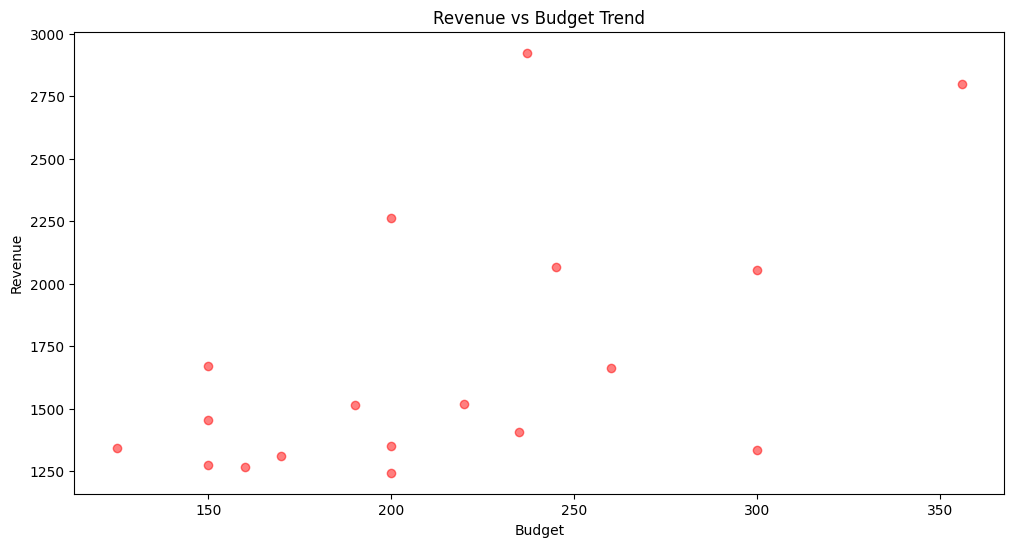

In [ ]:
#Revenue vs budget trend
plt.figure(figsize=(12, 6))
plt.scatter(new_movies_order_df['budget'], new_movies_order_df['revenue'], alpha=0.5, c='red')
plt.title('Revenue vs Budget Trend')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(False)
plt.show()

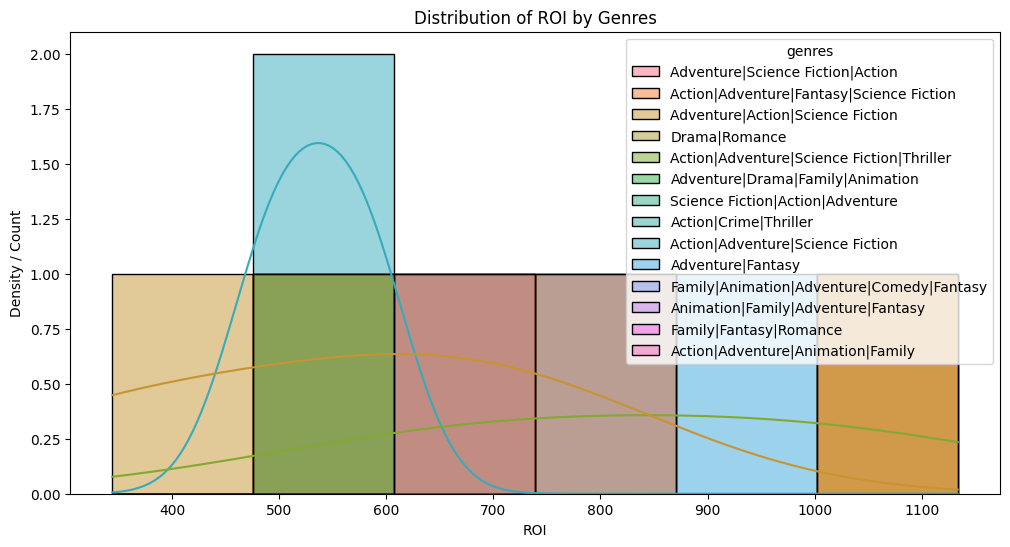

In [ ]:
# ROI distribution by genres
plt.figure(figsize=(12, 6))
sns.histplot(x=new_movies_order_df['roi'], hue=new_movies_order_df['genres'], kde=True)
plt.title('Distribution of ROI by Genres')
plt.xlabel('ROI')
plt.ylabel('Density / Count')
plt.grid(False)
plt.show()

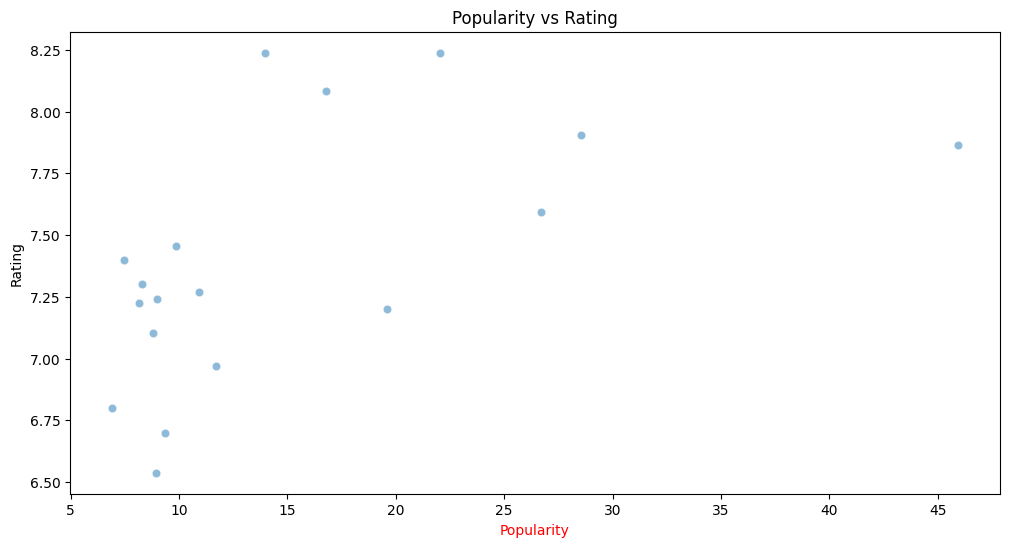

In [ ]:
#visualization of popularity vs rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x=new_movies_order_df['popularity'], y=new_movies_order_df['vote_average'], alpha=0.5)
plt.title('Popularity vs Rating')
plt.xlabel('Popularity', c = 'red')
plt.ylabel('Rating')
plt.show()

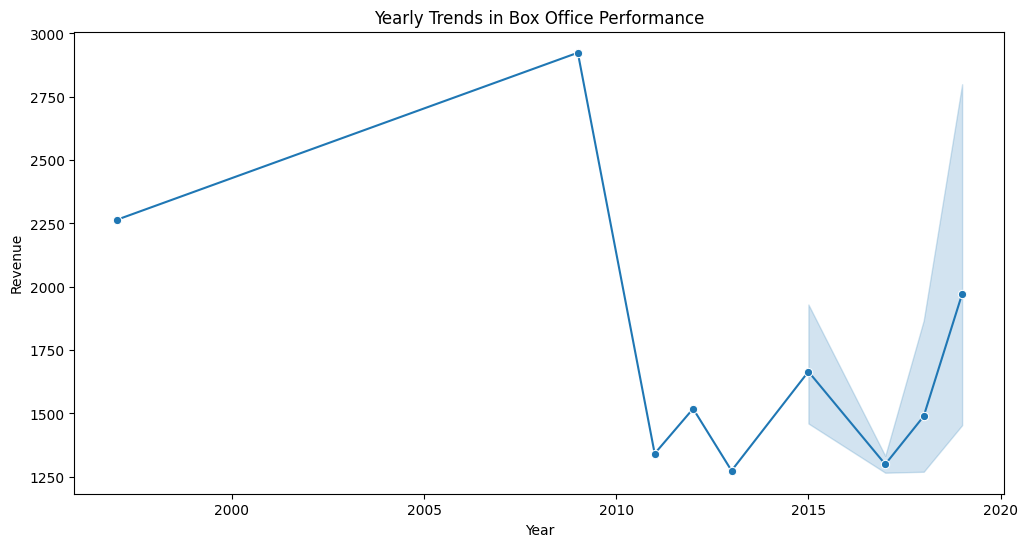

In [ ]:
# Yearly trends in Box Office Performance
plt.figure(figsize=(12, 6))
sns.lineplot(x=new_movies_order_df['release_date'].dt.year, y=new_movies_order_df['revenue'], marker='o')
plt.title('Yearly Trends in Box Office Performance')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(False)
plt.show()

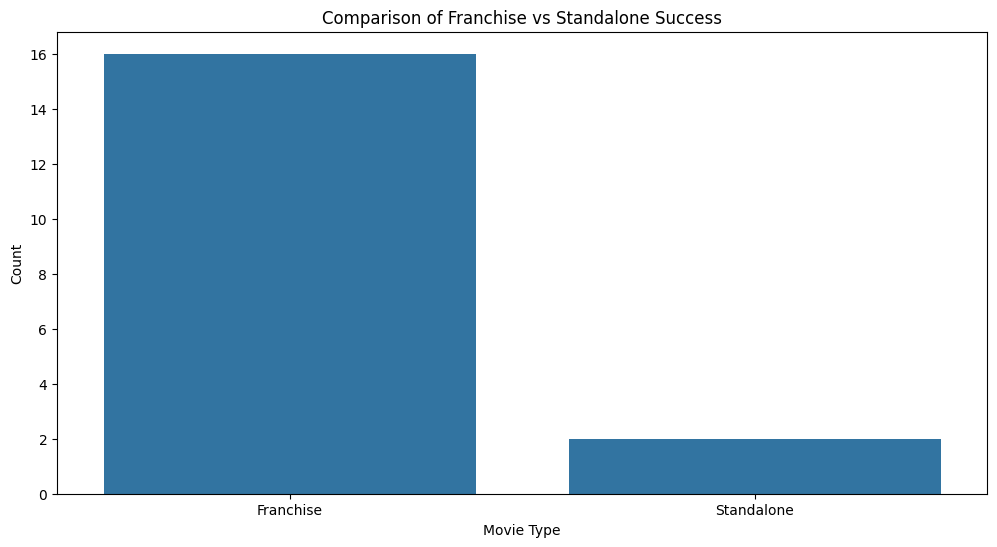

In [ ]:
# Visualizing comparison of Franchise vs standalone success
plt.figure(figsize=(12, 6))
sns.barplot(x=new_movies_order_df['movies_type'].value_counts().index, y=new_movies_order_df['movies_type'].value_counts().values)
plt.title('Comparison of Franchise vs Standalone Success')
plt.xlabel('Movie Type')
plt.ylabel('Count')
plt.show()